<a href="https://colab.research.google.com/github/Stuti0612/OCR-TRANSLATOR-SPEECH/blob/main/OCR%2BTRANSLATOR%2BSPEECH_(TEAM_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 8.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 4.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=c697e773522a4ab1c5df86400b2a27d490cddc1dfea8fe37e03517c4bbf07b44
  Stored in directory: /root/.cache/pip/wheels/dd/59/af/8d6c96a719763990f1c548e36b17d9efdfb767f42f7ff39f53
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
 

In [ ]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
from googletrans import Translator, constants
from pprint import pprint
from gtts import gTTS
from IPython.display import Audio
import matplotlib.pyplot as plt
import cv2
from pylab import rcParams
from IPython.display import Image
import easyocr

In [ ]:
reader=easyocr.Reader(['en','hi'])

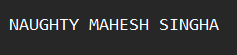

In [ ]:
rcParams['figure.figsize'] = 8, 16
file_name = "/content/YAMATE.png"
Image(file_name)

In [ ]:
output = reader.readtext(file_name)
output

[([[5, 15], [221, 15], [221, 35], [5, 35]],
  'NAUGHTY MAHESH SINGHA',
  0.7889933128500193)]

In [ ]:
bounds = reader.readtext(file_name, add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-')
bounds

[([[0, 7], [229, 7], [229, 43], [0, 43]],
  'NAUGHTY MAHESH SINGHA',
  0.8537535431229367)]

In [ ]:
import PIL
from PIL import ImageDraw
im=PIL.Image.open('/content/YAMATE.png')

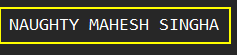

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [ ]:
text_list = reader.readtext(file_name, add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-', detail=0)
text_list

['NAUGHTY MAHESH SINGHA']

In [ ]:
text_comb=' '.join(text_list)
text_comb

'NAUGHTY MAHESH SINGHA'

In [ ]:
translator= Translator()

In [ ]:
print(translator.detect(text_comb))

Detected(lang=en, confidence=0.8588988)


In [ ]:
ta_tts=gTTS(text_comb,lang='en')
ta_tts.save('trans.mp3')
Audio('trans.mp3' , autoplay=True)

In [ ]:
text_hi=translator.translate(text_comb, dest='hi')
print(text_hi.text)

नटखट महेश सिंहा


In [ ]:
ta_tts=gTTS(text_hi.text,lang='hi')
ta_tts.save('trans.mp3')
Audio('trans.mp3' , autoplay=True)